In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys, json, math, io
from os import listdir
from os.path import isfile, join
from tqdm.auto import tqdm
import tikzplotlib as tkz

In [12]:
exp_path = 'exp1/'

_, filename = os.path.split(os.getcwd())
if filename == 'notebooks':
    old_dir = os.getcwd()
    os.chdir('../experiments/' + exp_path)
    print('Moving Current Directory from ' + old_dir + ' to ' + os.getcwd())
else:
    print('Current Directory is ' + os.getcwd())
    
files = [f for f in listdir('./') if isfile(join('./', f))]

Current Directory is /Users/ale/Desktop/BAISRB/experiments/exp1


In [13]:
data = {}
for i in tqdm(range(len(files))):
    with io.open(files[i], 'rb') as json_file:
        data[int(files[i].split('.')[0])] = json.load(json_file)


  0%|          | 0/19 [00:00<?, ?it/s]

In [14]:
T_list = list(data.keys())

T_list.sort()

algs = list(data[T_list[0]].keys())

n_runs = len(data[T_list[0]][algs[0]]['recommendations'])

T_list, algs, n_runs

([100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1200,
  1400,
  1600,
  1800,
  2400,
  2600,
  2800,
  3000,
  3200],
 ['\\uniform',
  '\\uniformsmooth',
  '\\ucbbubeck',
  '\\ucbeshort',
  '\\srbubeck',
  '\\succrejectshort',
  '\\probone',
  '\\etccella',
  '\\restsurecella'],
 100)

 & 100 & 200 & 300 & 400 & 500 & 600 & 700 & 800 & 900 & 1000 & 1200 & 1400 & 1600 & 1800 & 2400 & 2600 & 2800 & 3000 & 3200 \\
\uniform & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) \\
\uniformsmooth & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 0.34(0.09) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) \\
\ucbbubeck & 1.0(0.0) & 0.86(0.07) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 0.0(0.0) \\
\ucbeshort & 0.99(0.02) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.

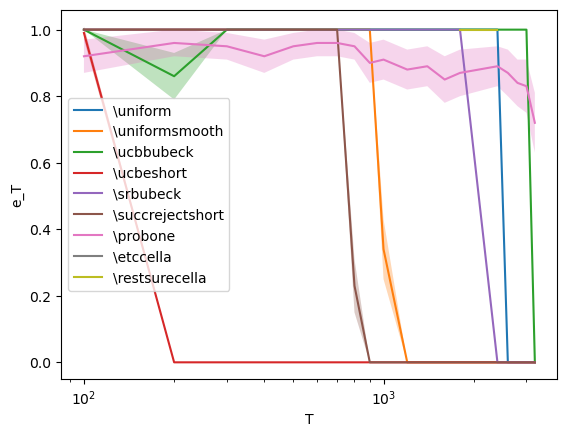

In [16]:
plt.figure()

for T_i, T in enumerate(T_list):
        print(' & ' + str(T) , end='')
print(' \\\\')        
        
for alg_i, alg in enumerate(algs):

    probs = np.zeros((n_runs, len(T_list)))
    
    for T_i, T in enumerate(T_list):
        probs[:, T_i] = data[T][alg]['recommendations']
        
    probs[probs > 0] = 1
    mean = np.mean(probs, axis=0)
    std = np.round(2 * np.std(probs, axis=0) / math.sqrt(n_runs), 2)
    bernulli_std = np.round(2 * np.sqrt(mean * (1 - mean) / n_runs), 2)
    plt.plot(T_list, mean, label=alg)
    plt.fill_between(T_list, mean - std, mean + std, alpha=0.3)
    
    
    print(alg + ' & ', end='')
    for T_i, T in enumerate(T_list):
        print(str(mean[T_i]) + '(' + str(std[T_i]) + ')', end='')
        if T_i < len(T_list) - 1:
            print(' & ', end='')
    print(' \\\\')
    
plt.ylabel('e_T')
plt.xscale('log')
plt.xlabel('T')
plt.legend(loc='best')